In [2]:
import xarray as xr
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import s3fs

Fetching the U-data

In [3]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-u.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
du = xr.open_zarr(store=store, consolidated=True)
du = du.rename({'depthu' : 'depth'})
du 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sozotaux              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    utau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    utau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    uwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vozocrtx              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean U grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:48 CEST
    title:             ocean U grid variables

In [4]:
u = du.vozocrtx
u.shape

(73, 75, 1801, 1580)

Fetching V-data

In [5]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-v.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
dv = xr.open_zarr(store=store, consolidated=True)
dv = dv.rename({'depthv' : 'depth'})
dv 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthv_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sometauy              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    vomecrty              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    vtau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vtau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean V grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:49 CEST
    title:             ocean V grid variables

In [6]:
v = dv.vomecrty
v.shape

(73, 75, 1801, 1580)

Fetching the variance and the covariance 

In [7]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [8]:
dset = open_s3fs('PC-data')
dset

<xarray.Dataset>
Dimensions:        (depth: 75, x: 1580, y: 1801)
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered  object ...
    time_counter   object ...
    nav_lat        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    vel            (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    mbathy         (y, x) int16 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    vomecrty       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    vozocrtx       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>

In [9]:
# rewriting the name of the variables 
vvar = dset.vomecrty
uvar = dset.vozocrtx
covar = dset.vel

Choosing a point 

In [10]:
# choosing a point 
x = 1020 
y = 1540 

In [11]:
uvar = uvar[:,y,x]
vvar = vvar[:,y,x]
cov = covar[:,y,x]
v = v[:,:,y,x]
u = u[:,:,y,x]

u-u.mean()

In [12]:
'c stands for centralized data. The mean is subtracted'
u_c = u - u.mean()
v_c = v - v.mean()

u_c = u_c.to_dataset()
v_c = v_c.to_dataset()
rådata_c = xr.merge([u_c,v_c], compat='override')
rådata_c

<xarray.Dataset>
Dimensions:        (depth: 75, time_counter: 73)
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
Data variables:
    vozocrtx       (time_counter, depth) float32 dask.array<chunksize=(1, 75), meta=np.ndarray>
    vomecrty       (time_counter, depth) float32 dask.array<chunksize=(1, 75), meta=np.ndarray>

In [13]:
'The original data without subtracted the mean'

#u = u.to_dataset()
#v = v.to_dataset()
#rådata = xr.merge([u,v], compat='override')
#rådata

'The original data without subtracted the mean'

In [14]:
A = xr.DataArray([[uvar,cov],[cov,vvar]], dims=["i", "j", "depth"])
A

<xarray.DataArray (i: 2, j: 2, depth: 75)>
array([[[ 7.6290686e-04,  7.4096303e-04,  7.1832229e-04,  6.9421867e-04,
          6.6086772e-04,  6.0906366e-04,  5.3916883e-04,  5.0896511e-04,
          4.8384810e-04,  4.6743653e-04,  3.9377520e-04,  3.0819737e-04,
          1.5554276e-04,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.8138307e-05, -2.9813506e-05, -2.8374703e-05, -2.6684203e-05,
...
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 4.1813159e-04,  3.9604475e-04,  3.7641838e-04,  3.5317719e-04,
          3.2739513e-04,  2.9279786e-04,  2.3922973e-04,  1.8037228e-04,
          1.3437182e-04,  1.0382041e-04,  8.5853935e-05,  7.8796649e-05,
          9.9078439e-05,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: i, j, depth

In [15]:
A.shape

(2, 2, 75)

In [35]:
'Function to calculate the eigenvalues, eigenvector an the featuring matrix for given level and covmatrix'
'Attempt II'

def eigen_func(covmatrix, level):
    values, vectors = np.linalg.eig(covmatrix[:,:,level])
    print('vectors:  ', vectors)
    print('values:  ',values)
    
    fm = np.array([vectors[0],vectors[1]])
    
    return fm, values, vectors

Plotting the first location 

vectors:   [[ 0.9967294   0.08081181]
 [-0.08081181  0.9967294 ]]
values:   [0.00076519 0.00041585]


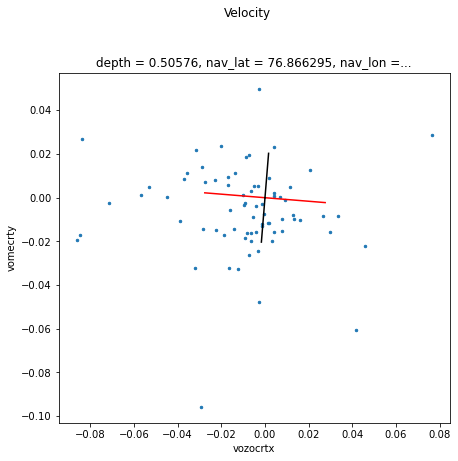

In [54]:
n = 0
fm, value, vector  = eigen_func(A,n)

# Plot data
fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_c.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[ 0.99698955  0.07753593]
 [-0.07753593  0.99698955]]
values:   [0.00069629 0.0003511 ]


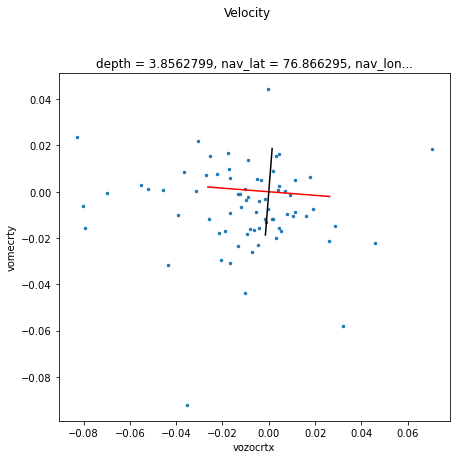

In [55]:
'same point, just depth level 3'
n = 3
fm, value, vector  = eigen_func(A,n)


fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_c.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) #aspect = ??

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[ 0.99958074 -0.02895398]
 [ 0.02895398  0.99958074]]
values:   [0.00050924 0.0001801 ]


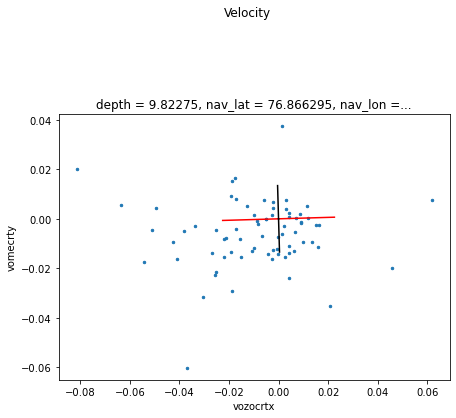

In [56]:
'same point, just depth level 7'
n = 7
fm, value, vector  = eigen_func(A,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_c.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) #aspect = ??

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()


vectors:   [[ 0.83060247 -0.5568658 ]
 [ 0.5568658   0.83060247]]
values:   [2.0164471e-04 5.2976491e-05]
[[ 0.83060247 -0.5568658 ]
 [ 0.5568658   0.83060247]]


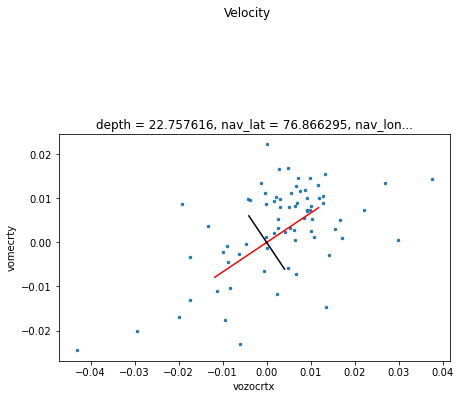

In [58]:
'same point, just depth level 12'
n = 12
fm, value, vector = eigen_func(A,n)
print(fm)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_c.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) #aspect = ??

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

Second location 

In [65]:
x = 800+200
y = 160+800

In [66]:
u = du.vozocrtx[:,:,y,x]
v = dv.vomecrty[:,:,y,x]

vvar = dset.vomecrty[:,y,x]
uvar = dset.vozocrtx[:,y,x]
covar = dset.vel[:,y,x]

In [67]:
'2 stands for second point. The mean is subtracted from the data'
u_2 = u - u.mean()
v_2 = v - v.mean()

u_2 = u_2.to_dataset()
v_2 = v_2.to_dataset()
rådata_2 = xr.merge([u_2,v_2], compat='override')
#rådata_2

In [68]:
#covariance matrix
B = xr.DataArray([[uvar,covar],[covar,vvar]], dims=["i", "j", "depth"])

In [69]:
B

<xarray.DataArray (i: 2, j: 2, depth: 75)>
array([[[ 3.7402911e-03,  3.7371512e-03,  3.7231022e-03,  3.6977180e-03,
          3.6601122e-03,  3.6091250e-03,  3.5600993e-03,  3.5149539e-03,
          3.4783073e-03,  3.4478093e-03,  3.4198896e-03,  3.3918596e-03,
          3.3537894e-03,  3.2923282e-03,  3.2011569e-03,  3.0907469e-03,
          2.9864272e-03,  2.9014209e-03,  2.8259214e-03,  2.7560238e-03,
          2.6977502e-03,  2.6414162e-03,  2.6088969e-03,  2.5844239e-03,
          2.5508753e-03,  2.5160210e-03,  2.4731662e-03,  2.4318497e-03,
          2.3800388e-03,  2.3235409e-03,  2.2431586e-03,  2.1593585e-03,
          2.0817711e-03,  2.0123546e-03,  1.9423553e-03,  1.8659427e-03,
          1.7962856e-03,  1.7271105e-03,  1.6513871e-03,  1.5817175e-03,
          1.5283062e-03,  1.4802058e-03,  1.4088440e-03,  1.2733538e-03,
          1.0194464e-03,  6.8185717e-04,  3.6734814e-04,  1.5814712e-04,
          5.3301454e-05,  1.3327581e-05,  1.8825897e-06,  1.0110375e-06,
          7.4617788e-07,  9.0269356e-07,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-5.3882541e-04, -5.4037932e-04, -5.3669570e-04, -5.2386185e-04,
...
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 4.9840803e-03,  4.9650138e-03,  4.9472195e-03,  4.9289190e-03,
          4.9050297e-03,  4.8764725e-03,  4.8324480e-03,  4.7768392e-03,
          4.7156583e-03,  4.6538883e-03,  4.5943097e-03,  4.5375284e-03,
          4.4817394e-03,  4.4267350e-03,  4.3708533e-03,  4.3122326e-03,
          4.2504240e-03,  4.1910321e-03,  4.1371360e-03,  4.0899240e-03,
          4.0386254e-03,  3.9664339e-03,  3.8783604e-03,  3.7932892e-03,
          3.7006976e-03,  3.6109379e-03,  3.5164147e-03,  3.4137643e-03,
          3.3088517e-03,  3.2003256e-03,  3.0622778e-03,  2.8835095e-03,
          2.7415049e-03,  2.5779598e-03,  2.4225060e-03,  2.2608689e-03,
          2.1140345e-03,  1.9800053e-03,  1.8610504e-03,  1.7532762e-03,
          1.6387597e-03,  1.5640416e-03,  1.4908117e-03,  1.3887128e-03,
          1.2010173e-03,  9.2341221e-04,  5.9158530e-04,  2.9656512e-04,
          1.2333324e-04,  5.0470197e-05,  9.8601668e-06,  3.3481190e-06,
          1.9424724e-06,  1.6349912e-06,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: i, j, depth

In [37]:
'Function to calculate the eigenvalues, eigenvector an the featuring matrix for given level'

def eigen_func(covmatrix, level):
    values, vectors = np.linalg.eig(covmatrix[:,:,level])
    print('vectors:  ', vectors)
    print('values:  ',values)
    
    fm = np.array([vectors[0],vectors[1]])
    
    return fm, values, vectors

vectors:   [[-0.93695766  0.34944296]
 [-0.34944296 -0.93695766]]
values:   [0.00353933 0.00518504]


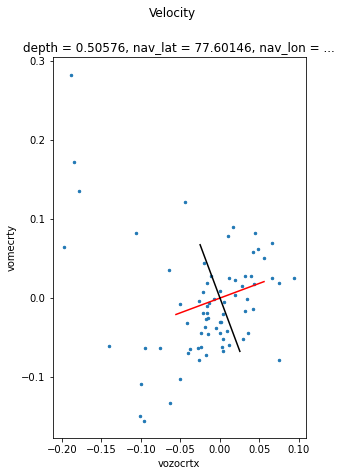

In [74]:
'Point B (see x,y) and level n'
n = 0 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.938502    0.34527376]
 [-0.34527376 -0.938502  ]]
values:   [0.00350499 0.00512165]


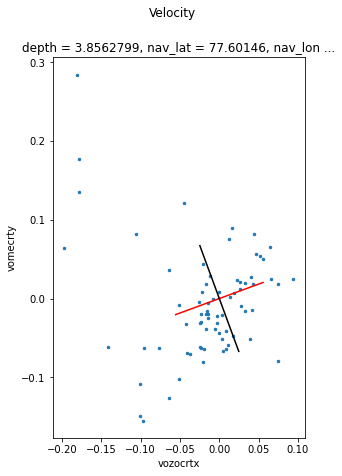

In [75]:
n = 3 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.962673    0.27066708]
 [-0.27066708 -0.962673  ]]
values:   [0.00325697 0.00457856]


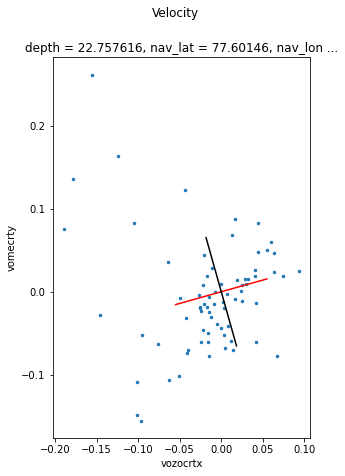

In [76]:
n = 12 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.98793954  0.15484002]
 [-0.15484002 -0.98793954]]
values:   [0.00266398 0.00407239]


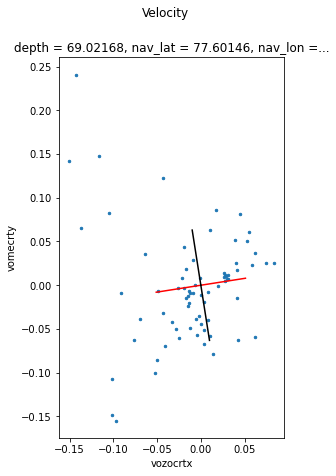

In [77]:
n = 20 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.98263127 -0.18556896]
 [ 0.18556896 -0.98263127]]
values:   [0.00221287 0.00309257]


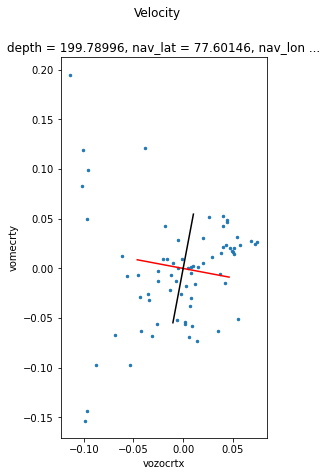

In [78]:
n = 30 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.7341754  -0.67895985]
 [ 0.67895985 -0.7341754 ]]
values:   [0.00087574 0.00229132]


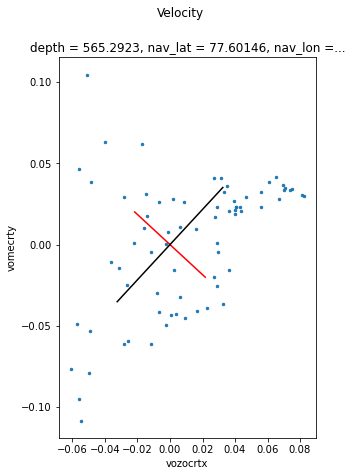

In [79]:
n = 40 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.96958673 -0.24474807]
 [ 0.24474807 -0.96958673]]
values:   [1.3396773e-06 1.0403080e-05]


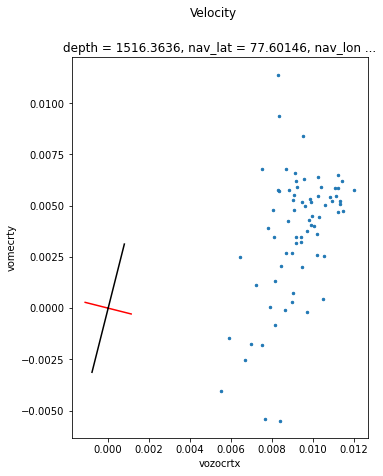

In [80]:
n = 50 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.9794627  -0.20162559]
 [ 0.20162559 -0.9794627 ]]
values:   [9.0762001e-07 3.4515365e-06]


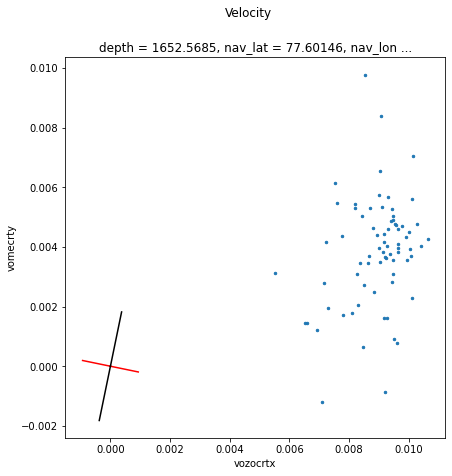

In [81]:
n = 51 
fm, value, vector = eigen_func(B,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_2.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

In [86]:
un = u[:,n] - u[:,n].mean()
vn = v[:,n] - v[:,n].mean()

dn = xr.merge([un,vn],compat='override')

In [88]:
dn

<xarray.Dataset>
Dimensions:        (time_counter: 73)
Coordinates:
    depth          float32 1.653e+03
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
Data variables:
    vozocrtx       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    vomecrty       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>

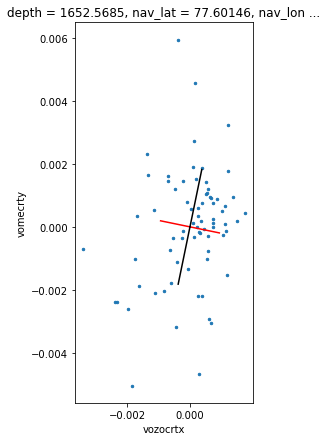

In [91]:
fig, axs = plt.subplots(figsize=(7,7))
dn.plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs)
axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

In [ ]:

un = u[:,n] - u[:,n].mean()
vn = v[:,n] - v[:,n].mean()

dn = xr.merge([un,vn],compat='override')

Punkt 3 

In [28]:
x = 820 + 200
y = 320 + 800 

In [29]:
vvar = dset.vomecrty
uvar = dset.vozocrtx
covar = dset.vel

v = dv.vomecrty
u = du.vozocrtx

uvar = uvar[:,y,x]
vvar = vvar[:,y,x]
cov = covar[:,y,x]
v = v[:,:,y,x]
u = u[:,:,y,x]

In [31]:
u_3 = u - u.mean()
v_3 = v - v.mean()

u_3 = u_3.to_dataset()
v_3 = v_3.to_dataset()
rådata_3 = xr.merge([u_3,v_3], compat='override')

In [35]:
C = xr.DataArray([[uvar,cov],[cov,vvar]], dims=["i", "j", "depth"])

vectors:   [[-0.99877614  0.04945886]
 [-0.04945886 -0.99877614]]
values:   [0.00021109 0.00035237]


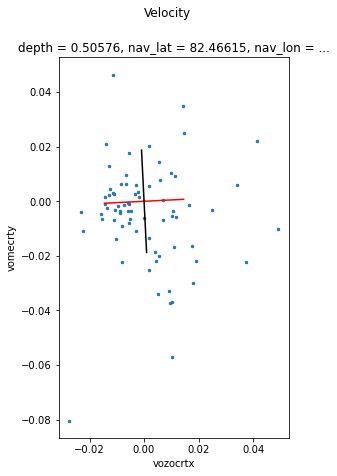

In [38]:
'Point B (see x,y) and level n'
n = 0 
fm, value, vector = eigen_func(C,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_3.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.91708344 -0.39869532]
 [ 0.39869532 -0.91708344]]
values:   [0.00010642 0.00020432]


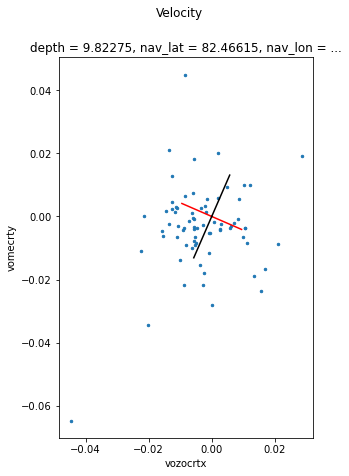

In [39]:
'Point B (see x,y) and level n'
n = 7 
fm, value, vector = eigen_func(C,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_3.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[ 0.91217285 -0.40980566]
 [ 0.40980566  0.91217285]]
values:   [1.2472307e-04 6.5861990e-05]


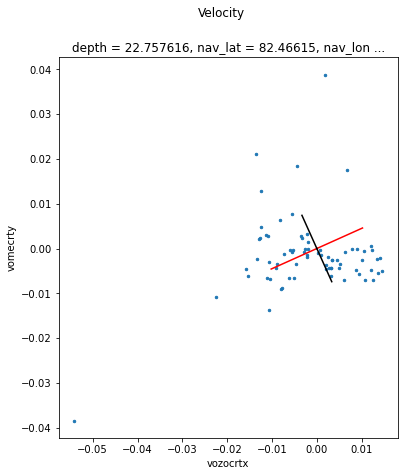

In [40]:
'Point B (see x,y) and level n'
n = 12 
fm, value, vector = eigen_func(C,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_3.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[ 0.931443   -0.36388734]
 [ 0.36388734  0.931443  ]]
values:   [7.4998839e-05 5.5726097e-05]


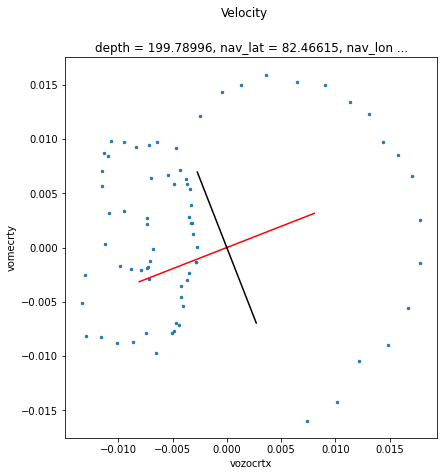

In [41]:
'Point B (see x,y) and level n'
n = 30 
fm, value, vector = eigen_func(C,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_3.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

vectors:   [[-0.93966687 -0.34209096]
 [ 0.34209096 -0.93966687]]
values:   [1.2884460e-06 2.1969404e-06]


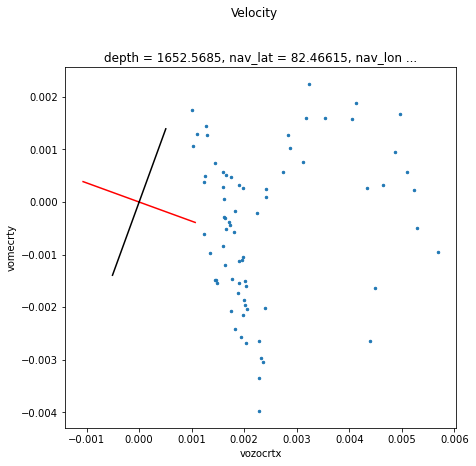

In [43]:
'Point B (see x,y) and level n'
n = 51 
fm, value, vector = eigen_func(C,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_3.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()

In [ ]:
'Point B (see x,y) and level n'
n = 60 
fm, value, vector = eigen_func(C,n)

fig, axs = plt.subplots(figsize=(7,7))
fig.suptitle('Velocity')

rådata_3.isel(depth=n, time_counter=slice(0,73)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, ax=axs) 

axs.plot([0,fm[0,0]*np.sqrt(value[0])],[0,fm[1,0]*np.sqrt(value[0])],'r') #PC1 
axs.plot([0,fm[0,0]*np.sqrt(value[0])*(-1)],[0,fm[1,0]*np.sqrt(value[0])*(-1)],'r')
axs.plot([0,fm[0,1]*np.sqrt(value[1])],[0,fm[1,1]*np.sqrt(value[1])],'k') #PC2 før: [1,0]
axs.plot([0,fm[0,1]*np.sqrt(value[1])*(-1)],[0,fm[1,1]*np.sqrt(value[1])*(-1)],'k')
axs.set_aspect('equal')

plt.show()